In [1]:
require 'terminal-table'

def bernoulli(p)
    rand < p ? 1 : 0
end

def reverse_binomial(m, p)
    c = 1.0 / Math.log(1 - p)
    z = 0
    i = 1
    loop do
        r = rand
        x = (c * Math.log(r)).floor
        z = z + x
        break unless i < m
        i += 1
    end
    z
end

def central_m(arr, k, mo)
    arr.map { |x| (x - mo)**k }.sum.to_f / arr.size
end
    
def mo_disp(arr)
    m = arr.size
    mo = arr.sum.to_f / m
    [
        mo, central_m(arr, 2, mo) * m / (m - 1.0)
    ]
end
    
def assim_excess(arr)
    m = arr.size
    mo = arr.sum.to_f / m
    [
        ((m * (m - 1.0))**0.5 / (m - 2.0)) * (central_m(arr, 3, mo) / central_m(arr, 2, mo)**1.5),
        ((m**2 - 1.0) / ((m - 2.0) * (m - 3.0))) * (central_m(arr, 4, mo) / central_m(arr, 2, mo)**2 - 3 + 6 / (m + 1.0))
    ]
end

p1 = 0.3
r2 = 6
p2 = 0.25
bernoulli_arr = 1000.times.map { bernoulli(p1) }
reverse_binomial_arr = 1000.times.map { reverse_binomial(r2, p2) }

puts Terminal::Table.new headings: ['Распределение', 'Оценка МО',
    'Оценка дисперсии', 'Оценка коэф. асимметрии', 'Оценка коэф. эксцесса',
    'Истинное МО', 'Истинная дисперсия', 'Истинный коэф. асимметрии', 'Истинный коэф. эксцесса'], rows: [
        ["Bi(1, #{p1})", *mo_disp(bernoulli_arr), *assim_excess(bernoulli_arr),
            p1, p1 * (1 - p1), (1 - 2 * p1) / (p1 * (1 - p1))**0.5, (6 * p1**2 - 6 * p1 + 1) / (p1 * (1 - p1))],
        ["!Bi(#{r2}, #{p2})", *mo_disp(reverse_binomial_arr), *assim_excess(reverse_binomial_arr),
            r2 * (1 - p2) / p2, r2 * (1 - p2) / p2**2, (2 - p2) / (r2 * (1 - p2))**0.5, 6.0 / r2 + p2**2 / (r2 * (1 - p2))],
    ]
nil

+---------------+-----------+---------------------+-------------------------+-----------------------+-------------+--------------------+---------------------------+-------------------------+
| Распределение | Оценка МО | Оценка дисперсии    | Оценка коэф. асимметрии | Оценка коэф. эксцесса | Истинное МО | Истинная дисперсия | Истинный коэф. асимметрии | Истинный коэф. эксцесса |
+---------------+-----------+---------------------+-------------------------+-----------------------+-------------+--------------------+---------------------------+-------------------------+
| Bi(1, 0.3)    | 0.306     | 0.21257657657657655 | 0.8432250114474253      | -1.2915587066662582   | 0.3         | 0.21               | 0.8728715609439696        | -1.238095238095237      |
| !Bi(6, 0.25)  | 18.074    | 68.64717117117118   | 0.8731422433164364      | 1.1783695452373557    | 18.0        | 72.0               | 0.8249579113843055        | 1.0138888888888888      |
+---------------+-----------+----------------

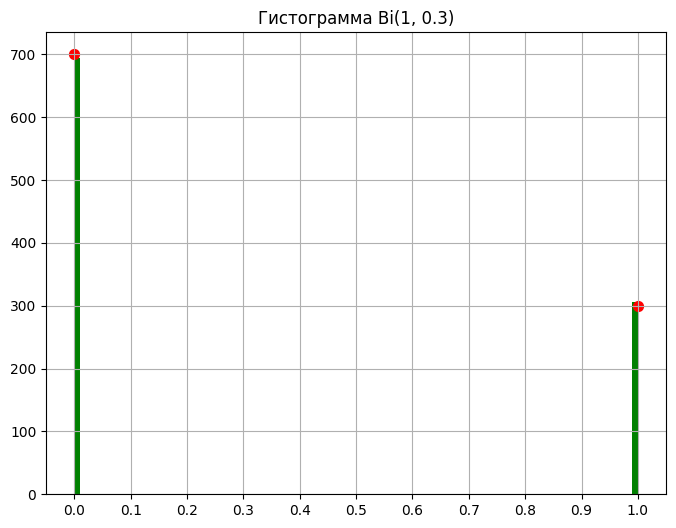

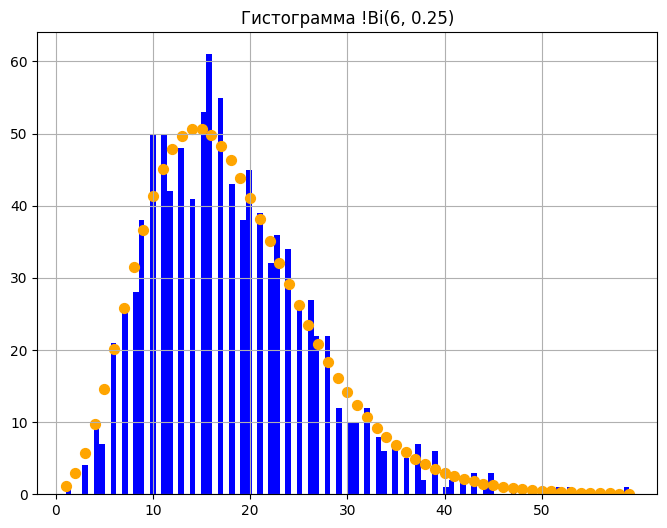

In [3]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
plt = Matplotlib::Pyplot

plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Гистограмма Bi(1, #{p1})")
plt.xticks((0..1).step(0.1).to_a)
plt.hist(bernoulli_arr, 100, cumulative: 0, color: 'green', zorder: 0)
plt.scatter([0, 1], [bernoulli_arr.size * (1 - p1), bernoulli_arr.size * p1], 50, "red", zorder: 1)
plt.grid
plt.show

plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Гистограмма !Bi(#{r2}, #{p2})")
plt.xticks((0..reverse_binomial_arr.max).step(10).to_a)
plt.hist(reverse_binomial_arr, 100, cumulative: 0, color: 'blue', zorder: 0)
plt.scatter((0..reverse_binomial_arr.max).to_a, (0..reverse_binomial_arr.max).map do |k|
    reverse_binomial_arr.size * Math.gamma(r2 + k) / (k * Math.gamma(k) * Math.gamma(r2)) * p2**r2 * (1.0 - p2)**k
end, 50, "orange", zorder: 1)
plt.grid
plt.show

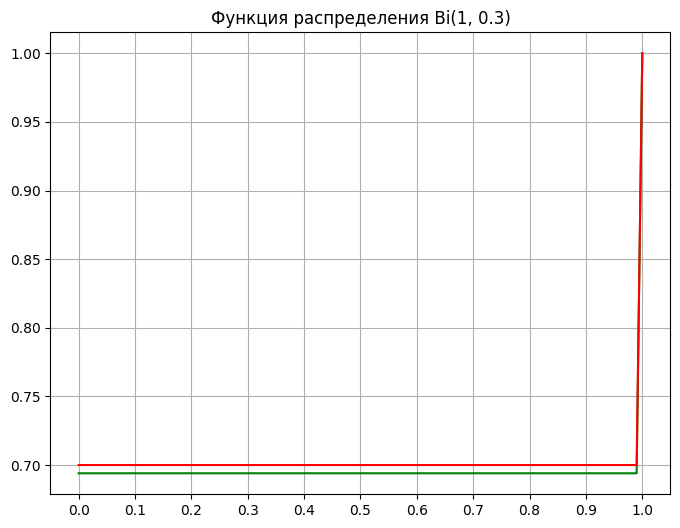

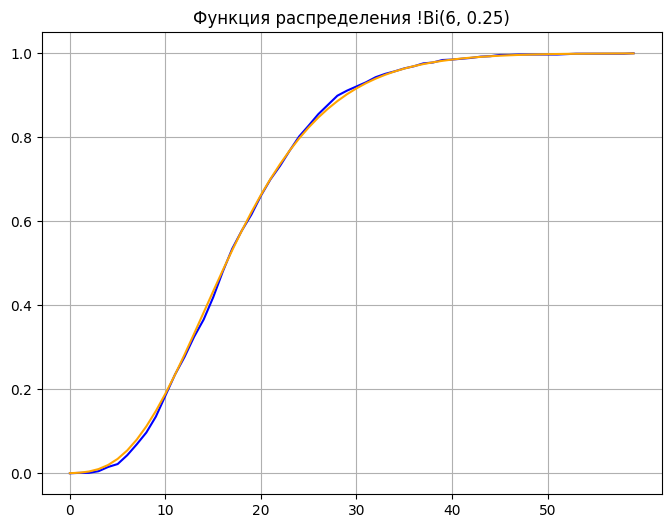

In [4]:
require 'distribution'
def real_distr(range, sorted_arr)
    res = []
    i = 0
    range.each do |p|
        res.push(res[-1] || 0)
        while i < sorted_arr.size && sorted_arr[i] <= p
            res[-1] += 1.0 / sorted_arr.size
            i += 1
        end
    end
    res
end

plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Функция распределения Bi(1, #{p1})")
plt.xticks((0..1).step(0.1).to_a)
plt.plot((0..1).step(0.01).to_a, real_distr((0..1).step(0.01), bernoulli_arr.sort), color: 'green')
# plt.plot((0..1).step(0.01).to_a, (0..1).step(0.01).map { |i| bernoulli_arr.find_all { |el| el <= i }.size.to_f / bernoulli_arr.size }, color: 'green')
plt.plot((0..1).step(0.01).to_a, (0..1).step(0.01).map { |k|  k == 1 ? 1 : 1 - p1 }, color: 'red')

plt.grid
plt.show

plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Функция распределения !Bi(#{r2}, #{p2})")
plt.xticks((0..reverse_binomial_arr.max).step(10).to_a)
plt.plot((0..reverse_binomial_arr.max).to_a, real_distr((0..reverse_binomial_arr.max), reverse_binomial_arr.sort), color: 'blue')
# plt.plot((0..reverse_binomial_arr.max).to_a, (0..reverse_binomial_arr.max).map { |i| reverse_binomial_arr.find_all { |el| el <= i }.size.to_f / reverse_binomial_arr.size }, color: 'blue')
plt.plot((0..reverse_binomial_arr.max).to_a, (0..reverse_binomial_arr.max).map { |k|  Math.regularized_beta(p2, r2, k + 1) }, color: 'orange')

plt.grid
plt.show

In [5]:
def quantile(p)
    [3.719, 3.090, 2.326, 1.999, 1.960, 1.645, 1.282, 1.000, 0.000].[](
        [99.99, 99.90, 99.00, 97.72, 97.50, 95.00, 90.00, 84.13, 50.00].find_index { |i| i <= p * 100 }
        )
end

def test_moments(res, epsilon, mo, disp)
    delta = quantile(1 - epsilon / 2)
    n = res.size
    m = res.sum.to_f / n
    ksi1 = m - mo
    ksi2 = (res.map { |a| (a - m)**2 }.sum / (n - 1)) - disp
    c1 = (12*n)**0.5
    c2 = ((n - 1) * (0.0056 * n**-1 + 0.0028 * n**-2 - 0.0083 * n**-3)**-0.5) / n
    [c1 * ksi1.abs < delta ? 'H0' : 'H1', c2 * ksi2.abs < delta ? 'H0' : 'H1']
end

def hi_sgr_quantile(k, epsilon)
    Distribution::ChiSquare.pchi2(k, 1 - epsilon)
end

def pearson_test(arr, k, epsilon, &f)
    min, max = arr.min, arr.max
    len = (max - min).to_f
    n = arr.size.to_f
    v_k = Array.new(k) { 0 }
    arr.each do |x|
        index = ((x - min) * k / len).floor
        index = k - 1 if index == k
        v_k[index] += 1 / n
    end
    p_k = (1..k).map { |i| f.call(min + i * len / k) - f.call(min + (i - 1) * len / k)}
    hi_sqr = (0...k).map { |i| (v_k[i] - p_k[i])**2 / p_k[i] }.sum * n
    hi_sqr > hi_sgr_quantile(k - 1, epsilon) ? 'H1' : 'H0'
end

[
    test_moments(bernoulli_arr, 0.05, p1, (1 - p1) * p1),
    pearson_test(reverse_binomial_arr, 10, 0.05) { |k|  Math.regularized_beta(p2, r2, k + 1) }
]

[["H0", "H0"], "H1"]

In [12]:
def normal(m, s, n)
    ((n.times.map { rand }.sum - 0.5 * n) / (n / 12.0)**0.5) * s + m
end

m1 = 0
s1 = 8
n1 = 192
normal_arr = 10_000.times.map { normal(m1, s1, n1) }

puts Terminal::Table.new headings: [
    'Оценка МО', 'Оценка дисперсии', 'Истинное МО', 'Истинная дисперсия'
], rows: [
        [*mo_disp(normal_arr), m1, s1**2],
]

+--------------------+-------------------+-------------+--------------------+
| Оценка МО          | Оценка дисперсии  | Истинное МО | Истинная дисперсия |
+--------------------+-------------------+-------------+--------------------+
| 0.0513870583867797 | 64.14813037593554 | 0           | 64                 |
+--------------------+-------------------+-------------+--------------------+


In [16]:
def chi_sqr(m, n)
    # m.times.map { normal(0, 1, n)**2 }.sum
    -2 * Math.log(((m / 2.0).floor).times.map { rand }.inject(&:*)) + (m.even? ? 0 : normal(0, 1, n)**2)
end

def laplace(a)
    y = rand
    y < 0.5 ? (1.0 / a) * Math.log(2 * y) :  (-1.0 / a) * Math.log(2 * (1 - y))
end

m2 = 4
a3 = 2
chi_sqr_arr = 10_000.times.map { chi_sqr(m2, n1) }
laplace_arr = 10_000.times.map { laplace(a3) }

puts Terminal::Table.new headings: [
    'Распределение', 'Оценка МО', 'Оценка дисперсии', 'Истинное МО', 'Истинная дисперсия'
], rows: [
    ["chi^2(#{m2})", *mo_disp(chi_sqr_arr), m2, 2 * m2],
    ["L(#{a3})", *mo_disp(laplace_arr), 0, 2.0 / a3**2],
]

+---------------+----------------------+-------------------+-------------+--------------------+
| Распределение | Оценка МО            | Оценка дисперсии  | Истинное МО | Истинная дисперсия |
+---------------+----------------------+-------------------+-------------+--------------------+
| chi^2(4)      | 4.004165152126952    | 8.000471605372974 | 4           | 8                  |
| L(2)          | 0.009425415594664196 | 0.503221243542925 | 0           | 0.5                |
+---------------+----------------------+-------------------+-------------+--------------------+


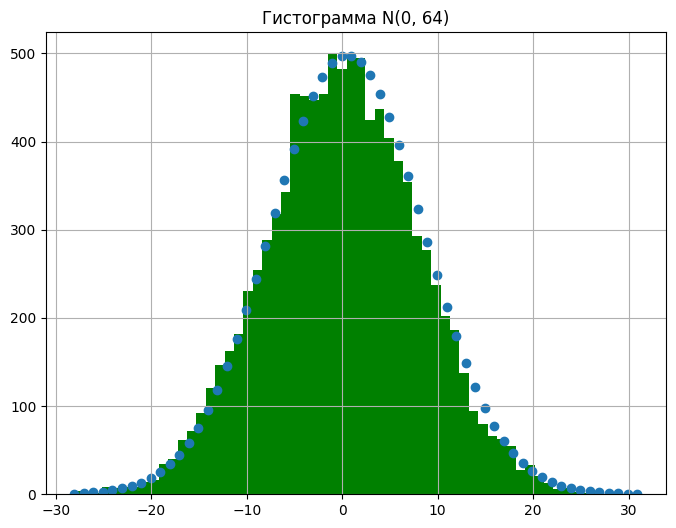

In [17]:
plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Гистограмма N(#{m1}, #{s1**2})")
range = (normal_arr.min..normal_arr.max)
plt.hist(normal_arr, range.size, cumulative: 0, color: 'green', zorder: 0)
plt.scatter(range.step(1.0).to_a,
    range.step(1.0).map do |k|
        normal_arr.size * (Distribution::Normal.cdf((k - m1).to_f / s1) - Distribution::Normal.cdf((k - m1 - 1).to_f / s1))
    end)
plt.grid
plt.show

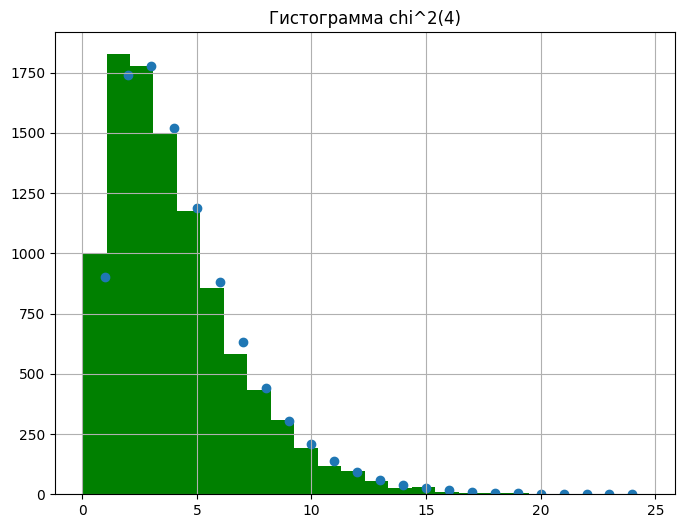

In [18]:
plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Гистограмма chi^2(#{m2})")
range = (1..chi_sqr_arr.max)
plt.hist(chi_sqr_arr, range.size, cumulative: 0, color: 'green', zorder: 0)
plt.scatter(range.step(1.0).to_a,
    range.step(1.0).map do |k|
        chi_sqr_arr.size * (Distribution::ChiSquare.cdf(k, m2) - Distribution::ChiSquare.cdf(k - 1, m2))
    end)
plt.grid
plt.show

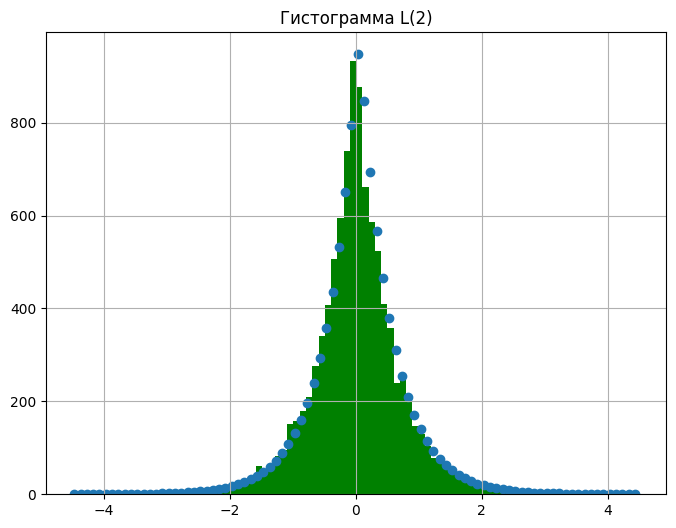

In [19]:
def laplace_f(x, l)
    x < 0 ? 0.5 * Math::E**(l * x) : 1 - 0.5 * Math::E**(-l * x)
end

plt.figure
plt.gcf.set_size_inches(8, 6)
plt.title("Гистограмма L(#{a3})")
range = (laplace_arr.min..laplace_arr.max)
plt.hist(laplace_arr, range.size * 10, cumulative: 0, color: 'green', zorder: 0)
plt.scatter(range.step(0.1).to_a,
    range.step(0.1).map do |k|
        laplace_arr.size * (laplace_f(k, a3) - laplace_f(k - 0.1, a3))
    end)
plt.grid
plt.show

In [20]:
def lambda(epsilon)
    case epsilon
    when 0.1
        1.22
    when 0.05
        1.36
    when 0.01
        1.63
    end
end

def kolmogorov_smirnov_test(sorted_arr, epsilon, &f)
    n = sorted_arr.size.to_f
    d_n = sorted_arr.map.with_index do |x, i|
        f_x = f.call(x)
        [i / n - f_x, f_x - (i - 1) / n]
    end.flatten.max
    return 'H0' if d_n * (n**0.5 + 0.12 + 0.11 / n**0.5) <= lambda(epsilon)
    d_n * n**0.5 <= lambda(epsilon) ? (n > 35 ? 'H0' : 'N') : 'H1'
end

[
    kolmogorov_smirnov_test(normal_arr.sort, 0.05) { |k| Distribution::Normal.cdf((k - m1).to_f / s1) },
    kolmogorov_smirnov_test(chi_sqr_arr.sort, 0.05) { |k| Distribution::ChiSquare.cdf(k, m2) },
    kolmogorov_smirnov_test(laplace_arr.sort, 0.05) { |k| laplace_f(k, a3) }
]

["H0", "H0", "H0"]